In [54]:
import pandas as pd
import numpy as np
# import panel as pn
# pn.extension("tabulator")

import hvplot.pandas
import matplotlib.pyplot as plt
from statistics import mean

In [55]:
df = pd.read_csv("survey.csv")

In [56]:
print(df.head())

            Timestamp   Age Primary streaming service  Hours per day  \
0  8/27/2022 19:29:02  18.0                   Spotify            3.0   
1  8/27/2022 19:57:31  63.0                   Pandora            1.5   
2  8/27/2022 21:28:18  18.0                   Spotify            4.0   
3  8/27/2022 21:40:40  61.0             YouTube Music            2.5   
4  8/27/2022 21:54:47  18.0                   Spotify            4.0   

  While working Instrumentalist Composer         Fav genre Exploratory  \
0           Yes             Yes      Yes             Latin         Yes   
1           Yes              No       No              Rock         Yes   
2            No              No       No  Video game music          No   
3           Yes              No      Yes              Jazz         Yes   
4           Yes              No       No               R&B         Yes   

  Foreign languages  ...  Frequency [R&B]  Frequency [Rap] Frequency [Rock]  \
0               Yes  ...        Sometimes  

In [57]:
# Drop BPM column and all NaN values
df.drop(columns=["BPM"], inplace=True)
df = df.dropna()
# DF now includes a total of 718 rows

In [58]:
# Change Age, Anxiety, Depression, Insomnia, and OCD columns to int from float
df["Age"] = df["Age"].astype("int")
df["Anxiety"] = df["Anxiety"].astype("int")
df["Depression"] = df["Depression"].astype("int")
df["Insomnia"] = df["Insomnia"].astype("int")
df["OCD"] = df["OCD"].astype("int")

In [59]:
df

,Timestamp,Age,Primary streaming service,Hours per day,While working,Instrumentalist,Composer,Fav genre,Exploratory,Foreign languages,...,Frequency [R&B],Frequency [Rap],Frequency [Rock],Frequency [Video game music],Anxiety,Depression,Insomnia,OCD,Music effects,Permissions
2,8/27/2022 21:28:18,18,Spotify,4.0,No,No,No,Video game music,No,Yes,...,Never,Rarely,Rarely,Very frequently,7,7,10,2,No effect,I understand.
3,8/27/2022 21:40:40,61,YouTube Music,2.5,Yes,No,Yes,Jazz,Yes,Yes,...,Sometimes,Never,Never,Never,9,7,3,3,Improve,I understand.
4,8/27/2022 21:54:47,18,Spotify,4.0,Yes,No,No,R&B,Yes,No,...,Very frequently,Very frequently,Never,Rarely,7,2,5,9,Improve,I understand.
5,8/27/2022 21:56:50,18,Spotify,5.0,Yes,Yes,Yes,Jazz,Yes,Yes,...,Very frequently,Very frequently,Very frequently,Never,8,8,7,7,Improve,I understand.
6,8/27/2022 22:00:29,18,YouTube Music,3.0,Yes,Yes,No,Video game music,Yes,Yes,...,Rarely,Never,Never,Sometimes,4,8,6,0,Improve,I understand.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
731,10/30/2022 14:37:28,17,Spotify,2.0,Yes,Yes,No,Rock,Yes,Yes,...,Never,Rarely,Very frequently,Never,7,6,0,9,Improve,I understand.
732,11/1/2022 22:26:42,18,Spotify,1.0,Yes,Yes,No,Pop,Yes,Yes,...,Never,Never,Sometimes,Sometimes,3,2,2,5,Improve,I understand.
733,11/3/2022 23:24:38,19,Other streaming service,6.0,Yes,No,Yes,Rap,Yes,No,...,Sometimes,Sometimes,Rarely,Rarely,2,2,2,2,Improve,I understand.
734,11/4/2022 17:31:47,19,Spotify,5.0,Yes,Yes,No,Classical,No,No,...,Never,Never,Never,Sometimes,2,3,2,1,Improve,I understand.


# Grouped Bar Plot

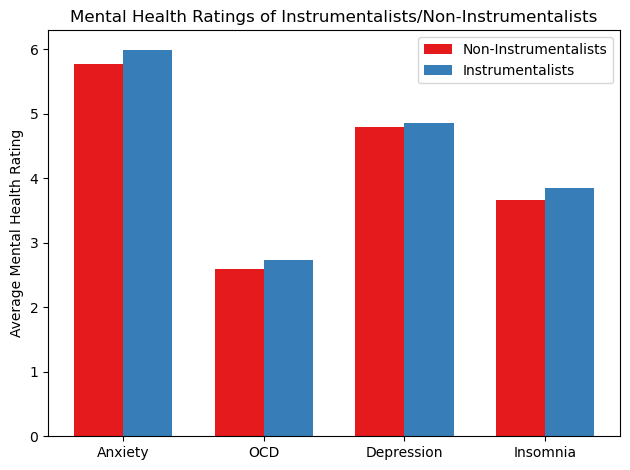

In [86]:
#Groupings of data of Instrumentalists vs non-instrumentalists
df_no = df[df['Instrumentalist'] == 'No'] 
df_yes = df[df['Instrumentalist'] == 'Yes'] 

#anxiety data
non_instrumentalist_anxiety = df_no["Anxiety"].tolist()
instrumentalist_anxiety = df_yes["Anxiety"].tolist()
mean_non_instrumentalist_anxiety = mean(non_instrumentalist_anxiety)
mean_instrumentalist_anxiety = mean(instrumentalist_anxiety)

#OCD data
non_instrumentalist_OCD = df_no["OCD"].tolist()
instrumentalist_OCD = df_yes["OCD"].tolist()
mean_non_instrumentalist_OCD = mean(non_instrumentalist_OCD)
mean_instrumentalist_OCD = mean(instrumentalist_OCD)

#depression data
non_instrumentalist_depression = df_no["Depression"].tolist()
instrumentalist_depression = df_yes["Depression"].tolist()
mean_non_instrumentalist_depression = mean(non_instrumentalist_depression)
mean_instrumentalist_depression = mean(instrumentalist_depression)

#Insomnia data
non_instrumentalist_insomnia = df_no["Insomnia"].tolist()
instrumentalist_insomnia = df_yes["Insomnia"].tolist()
mean_non_instrumentalist_insomnia = mean(non_instrumentalist_insomnia)
mean_instrumentalist_insomnia = mean(instrumentalist_insomnia)

labels = ["Anxiety", "OCD", "Depression", "Insomnia"]
yes_means = [mean_instrumentalist_anxiety, mean_instrumentalist_OCD, mean_instrumentalist_depression, mean_instrumentalist_insomnia]
no_means = [mean_non_instrumentalist_anxiety, mean_non_instrumentalist_OCD, mean_non_instrumentalist_depression, mean_non_instrumentalist_insomnia]

x = np.arange(len(labels))
width = 0.35

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, no_means, width, label='Non-Instrumentalists', color="#e41a1c")  # color blind friendly red
rects2 = ax.bar(x + width/2, yes_means, width, label='Instrumentalists', color="#377eb8")  # color blind friendly blue

ax.set_ylabel('Average Mental Health Rating')
ax.set_title('Mental Health Ratings of Instrumentalists/Non-Instrumentalists')
ax.set_xticks(x, labels)
ax.legend()

fig.tight_layout()

plt.show()


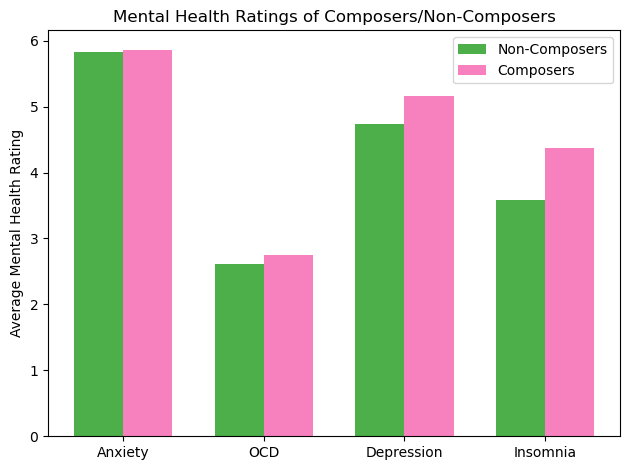

In [88]:
#Groupings of data of Composers vs non-composers
df_no = df[df['Composer'] == 'No'] 
df_yes = df[df['Composer'] == 'Yes'] 

#anxiety data
non_composer_anxiety = df_no["Anxiety"].tolist()
composer_anxiety = df_yes["Anxiety"].tolist()
mean_non_composer_anxiety = mean(non_composer_anxiety)
mean_composer_anxiety = mean(composer_anxiety)

#OCD data
non_composer_OCD = df_no["OCD"].tolist()
composer_OCD = df_yes["OCD"].tolist()
mean_non_composer_OCD = mean(non_composer_OCD)
mean_composer_OCD = mean(composer_OCD)

#depression data
non_composer_depression = df_no["Depression"].tolist()
composer_depression = df_yes["Depression"].tolist()
mean_non_composer_depression = mean(non_composer_depression)
mean_composer_depression = mean(composer_depression)

#Insomnia data
non_composer_insomnia = df_no["Insomnia"].tolist()
composer_insomnia = df_yes["Insomnia"].tolist()
mean_non_composer_insomnia = mean(non_composer_insomnia)
mean_composer_insomnia = mean(composer_insomnia)

labels = ["Anxiety", "OCD", "Depression", "Insomnia"]
yes_means = [mean_composer_anxiety, mean_composer_OCD, mean_composer_depression, mean_composer_insomnia]
no_means = [mean_non_composer_anxiety, mean_non_composer_OCD, mean_non_composer_depression, mean_non_composer_insomnia]

x = np.arange(len(labels))
width = 0.35

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, no_means, width, label='Non-Composers', color="#4daf4a")  # color blind friendly red
rects2 = ax.bar(x + width/2, yes_means, width, label='Composers', color="#f781bf")  # color blind friendly blue

ax.set_ylabel('Average Mental Health Rating')
ax.set_title('Mental Health Ratings of Composers/Non-Composers')
ax.set_xticks(x, labels)
ax.legend()

fig.tight_layout()

plt.show()